In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shapefile as shp
%matplotlib inline

In [57]:
df = pd.read_csv('/Users/yaredhurisa/Google Drive/Probability of conflict/indicators/eth_cc_final_dataset_monthly.csv')
df1 = pd.read_csv('/Users/yaredhurisa/Google Drive/Probability of conflict/indicators/eth_cc_forecast_12_month.csv')
df2 = pd.read_csv('/Users/yaredhurisa/Google Drive/Probability of conflict/data/eth_admin.csv', encoding = 'utf-16')

In [58]:
df1[['Admin2','Admins3']] = df1.group.str.split("_",expand=True,)

In [59]:
shp_path = "/Users/yaredhurisa/Google Drive/Probability of conflict/data/ET_Admin2_2014/ET_Admin2_2014.shp"
sf = shp.Reader(shp_path)

In [42]:
len(sf.shapes())

77

In [60]:
sf.records()[1]

Record #1: ['ET2014A20411', 2014, 'ET', 'Ethiopia', 'Oromia', '', '', '', 'Bale', '', '', '', '']

In [26]:
sns.set(style = "whitegrid", palette= "pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [69]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df_sf = pd.DataFrame(columns=fields, data=records)
    df_sf = df_sf.assign(Geometry=shps)
    return df_sf

In [70]:
df_sf = read_shapefile(sf)
df_sf.shape

TypeError: Expected list, got _Record

In [48]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [54]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

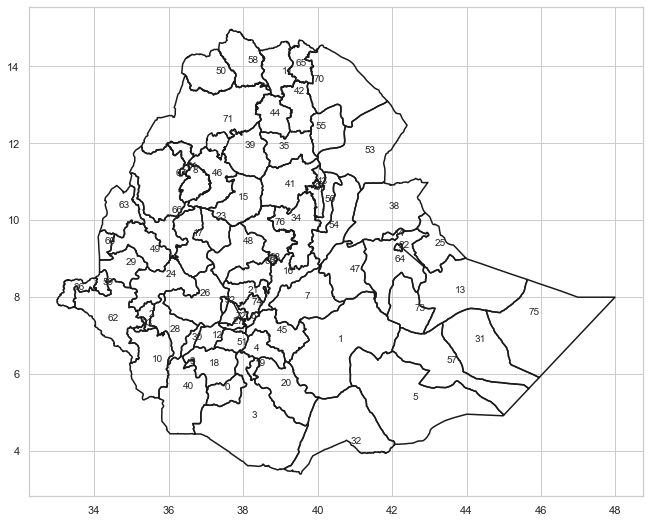

In [55]:
plot_map(sf)